# Regression Analysis in Statsmodels - Lab

## Introduction

In the previous code along, we looked all the requirements for running an ols simple regression using statsmodels. We worked with a toy example to understand the process and all the necessary steps that must be performed. In this lab , we shall look at a slightly more complex example to study the impact of spendings in different advertising channels of total sales.

## Objectives

You will be able to:
* Set up an analytical question to be answered by regression analysis
* Study regression assumptions for real world datasets
* Visualize the results of regression analysis

## Let's get started

In this lab, we will work with the "Advertising Dataset" which is a very popular dataset for studying simple regression. [The dataset is available at Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have already downloaded for you. It is available as "Advertising.csv". We shall use this dataset to ask ourselves a simple analytical question:

## The Question

Which advertising channel has a strong relationship with sales volume, and can be used to model and predict the sales. 

### Step 1: Read the dataset and inspect its columns and 5-point statistics

In [1]:
# Load necessary libraries and import the data
import pandas as pd
import scipy.stats as stats
from scipy.stats import kurtosis, skew
import statsmodels.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df = pd.read_csv('Advertising.csv') 
df.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [2]:
# Check the columns and first few rows
df.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Get the 5-point statistics for data 
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
# Describe the contents of this dataset
'''There are 200 observations.
The are 3 predictor variables(x) for advertising via TV, radio, newspaper and the target variable (y)sales.
The highest advertising spending was that for TV advertising with a mean of 147.042500 and lowest on radio advertising with a mean of 23.264.
'''

'There are 200 observations.\nThe are 3 predictor variables(x) for advertising via TV, radio, newspaper and the target variable (y)sales.\nThe highest advertising spending was that for TV advertising with a mean of 147.042500 and lowest on radio advertising with a mean of 23.264.\n'

### Step 2: Plot histograms with kde overlay to check for the normality of the predictors

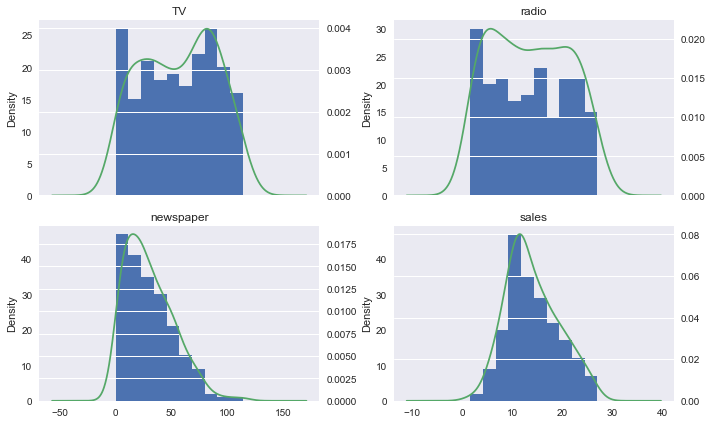

/Users/rndatasc/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


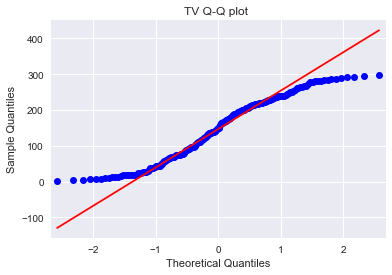

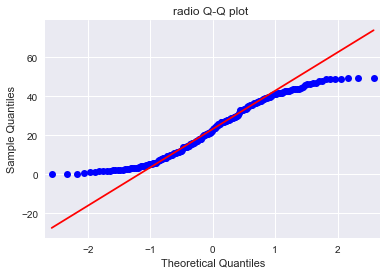

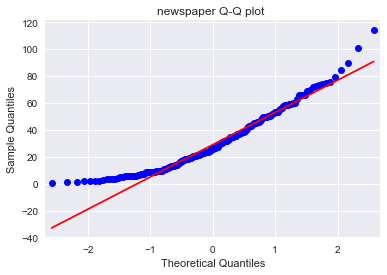

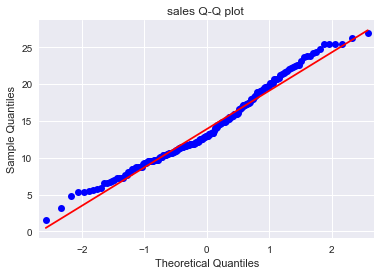

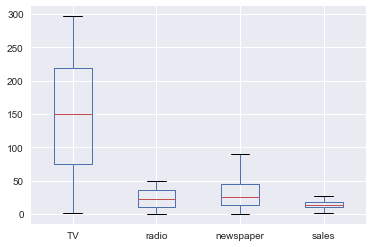

In [5]:
# For all the variables, check if they hold normality assumption
#The linearity assumption can best be tested with scatter plots
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

k = len(df.columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()
plt.show()


import numpy as np 
import pylab 
import scipy.stats as stats

from statsmodels.graphics.gofplots import qqplot

data = df.TV
qqplot(data, line = 'q')
plt.title('TV Q-Q plot ')
plt.show()

data = df.radio
qqplot(data, line = 'q')
plt.title('radio Q-Q plot ')
plt.show()

data = df.newspaper
qqplot(data, line = 'q')
plt.title('newspaper Q-Q plot ')
plt.show()

data = df.sales
qqplot(data, line = 'q')
plt.title('sales Q-Q plot ')
plt.show()


# df.plot.kde()
# plt.title('Normality check')

# plt.subplot(121)
# plt.hist(df.TV,  alpha = 0.5, color = 'r')
# plt.xlabel('TV')
# plt.ylabel('sales')

# plt.subplot(122)
# plt.hist(df.radio,  alpha = 0.5, color = 'g')
# plt.xlabel('radio')

# plt.title('Normality Check')
# plt.show()


# fig, ax = plt.subplots(1,2)
# ax[0].hist(df.newspaper,  alpha = 0.5, color = 'b', label='newspaper')
# plt.xlabel('newspaper')
# ax[1].hist(df.sales,  alpha = 0.5, color = 'y')
# plt.xlabel('sales')
# plt.title('Normality Check')
# plt.show()
d1 = (df.TV.mean(), df.TV.std(), 200)
d2 = (df.radio.mean(), df.radio.std(), 200)
d3 = (df.newspaper.mean(), df.newspaper.std(), 200)

# mu = df.TV.mean()
# sigma = df.TV.std()
# N = 200
# s = (mu, sigma, N)
# sns.distplot(s);


# sns.distplot([(x - df.TV.mean())/df.TV.std() for x in d1]) 
# plt.title('TV'); 
# plt.show
# sns.distplot([(x - df.radio.mean())/df.radio.std() for x in d2])
# plt.title('radio'); 
# plt.show;
# sns.distplot([(x - df.newspaper.mean())/df.newspaper.std() for x in d2])
# plt.title('newspaper'); 
# plt.show;

df.plot(kind='box')
plt.show()




In [6]:
# Record your observations on normality here 
'''The visual inspection of the histogram, QQplot and box plots showed that:
None of the variables show a perfectly normally distributed data. (bell curve)
The TV and radio ads histograms have the approximate shape of a normal curve/has symmetrical pattern.
The newspaper ads data is skewed to the right/positively skewed and will be problematic for modelling as the mean may not be the best measure of central tendency.
The dependent variable "sales" is normally distributed.
The qq plots show that the values are approximately distributed along the line
'''

'The visual inspection of the histogram, QQplot and box plots showed that:\nNone of the variables show a perfectly normally distributed data. (bell curve)\nThe TV and radio ads histograms have the approximate shape of a normal curve/has symmetrical pattern.\nThe newspaper ads data is skewed to the right/positively skewed and will be problematic for modelling as the mean may not be the best measure of central tendency.\nThe dependent variable "sales" is normally distributed.\nThe qq plots show that the values are approximately distributed along the line\n'

#### Remember . Nothing is perfect . So be positive 
<img src="https://4.bp.blogspot.com/-e-CL8iluz2o/Vt3Ntg_38kI/AAAAAAAAIJo/zGJMyNaMbFY/s1600/skewed.jpg" width=400>

### Step 3: Test for the linearity assumption. 
Use scatterplots to plot each predictor against the target variable

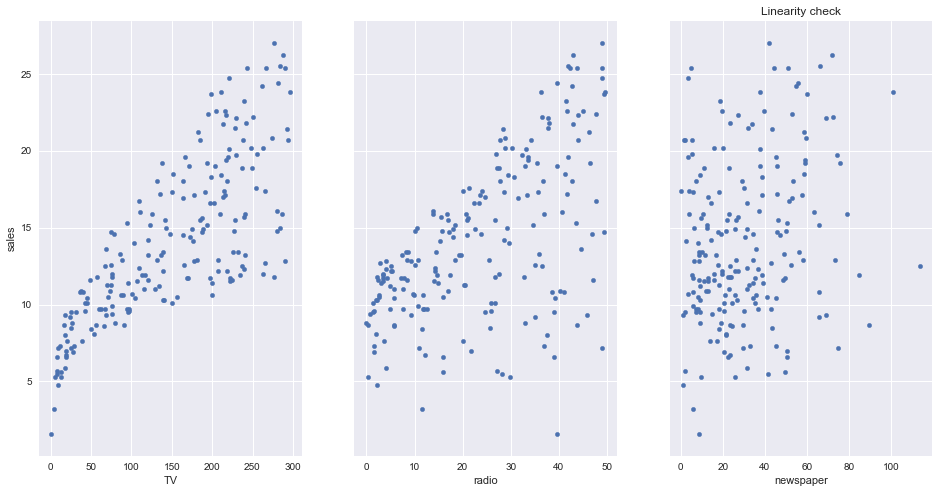

In [7]:
# visualize the relationship between the preditors and the target using scatterplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0],  figsize=(16, 8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]) 

plt.title('Linearity check')
plt.show()



In [137]:
# Record yor observations on linearity here 

'''The scatter plot of the predictor variables create a cone-like(heteroscedasticity) shape.
As the variability of the sales widens and value of the TV and radio ads increases.

There is a positive correlation between TV ads and sales, 
low positive correlation between radio ads and sales, and very low/weak correlation between newspaper ads and sales.
TV ads have the highest contribution to increased sales, radio ads have some increased effect on sales 
and newspaper ads have very little effect on sales. 
'''


'The scatter plot of the predictor variables create a cone-like(heteroscedasticity) shape.\nAs the variability of the sales widens and value of the TV and radio ads increases.\n\nThere is a high positive correlation between TV ads and sales, \nlow positive correlation between radio ads and sales, and very low/weak correlation between newspaper ads and sales.\nTV ads have the highest contribution to increased sales, radio ads have some increased effect on sales \nand newspaper ads have very little effect on sales. \n'

### Conclusion so far !

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We shall move ahead with our analysis using TV and radio , and count out the newspaper due to the fact that data violates ols assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. We shall talk about this in the next section. 

### Step 4: Run a simple regression in `statsmodels` with TV as a predictor

In [9]:
# import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols


import matplotlib.pyplot as plt
plt.style.use('seaborn')

# build the formula 
f = 'sales~TV'
# create a fitted model in one line
model = ols(formula=f, data=df).fit()



### Step 5: Get regression diagnostics summary


In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           1.47e-42
Time:                        15:28:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Record your observations on "Goodness of fit"

In [11]:
'''R-squared value is 0.612 i.e. 61% of variance in the target variable can be explained using the spendings on TV. 
The remaining 39% represents the variance explained by error, in this case is somewhat high, putting our model 
at high risk of variance and decreases model performance.

The Intercept: A "unit" increase in TV spending is associated with a 0.0475 "unit" increase in Sales. 
OR An additional 1,000 spent on TV is associated with an increase in sales of 47.5

The p-value for TV ads is < 0.05, and so we can decide that there is a relationship between TV ads and Sales.'''




'R-squared value is 0.612 i.e. 61% of variance in the target variable can be explained using the spendings on TV. \nThe remaining 39% represents the variance explained by error, in this case is somewhat high, putting our model \nat high risk of variance and decreases model performance.\n\nThe Intercept: A "unit" increase in TV spending is associated with a 0.0475 "unit" increase in Sales. \nOR An additional 1,000 spent on TV is associated with an increase in sales of 47.5\n\nThe p-value for TV ads is < 0.05, and so we can decide that there is a relationship between TV ads and Sales.'


Note here that the coefficients represent associations, not causations


### Step 6:  Draw a prediction line with data points omn a scatter plot for X (TV) and Y (Sales)

Hint: We can use `model.predict()` functions to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

In [12]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sales ~ TV', data=df).fit()

# print the coefficients
lm.params
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

lm.predict(X_new), lm.conf_int(),lm.pvalues,lm.rsquared


(0    9.409426
 dtype: float64,                   0         1
 Intercept  6.129719  7.935468
 TV         0.042231  0.052843, Intercept    1.406300e-35
 TV           1.467390e-42
 dtype: float64, 0.611875050850071)

      TV
0    0.7
1  296.4
0     7.065869
1    21.122454
dtype: float64


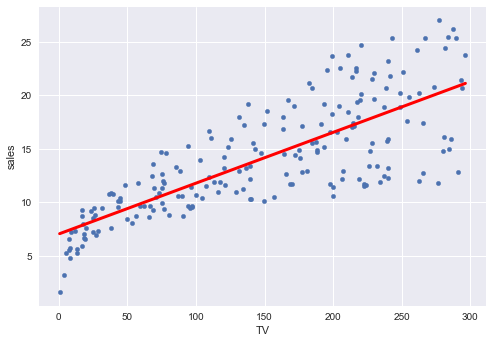

In [141]:

# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [df.TV.min(), df.TV.max()]})

print(X_new.head())

# make predictions for those x values and store them
predictions = model.predict(X_new)
preds = model.predict(X_new)
print (predictions)

# first, plot the observed data and the least squares line
df.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new, predictions, c='red', linewidth=3)
plt.show()



### Step 7: Visualize the error term for variance and heteroscedasticity

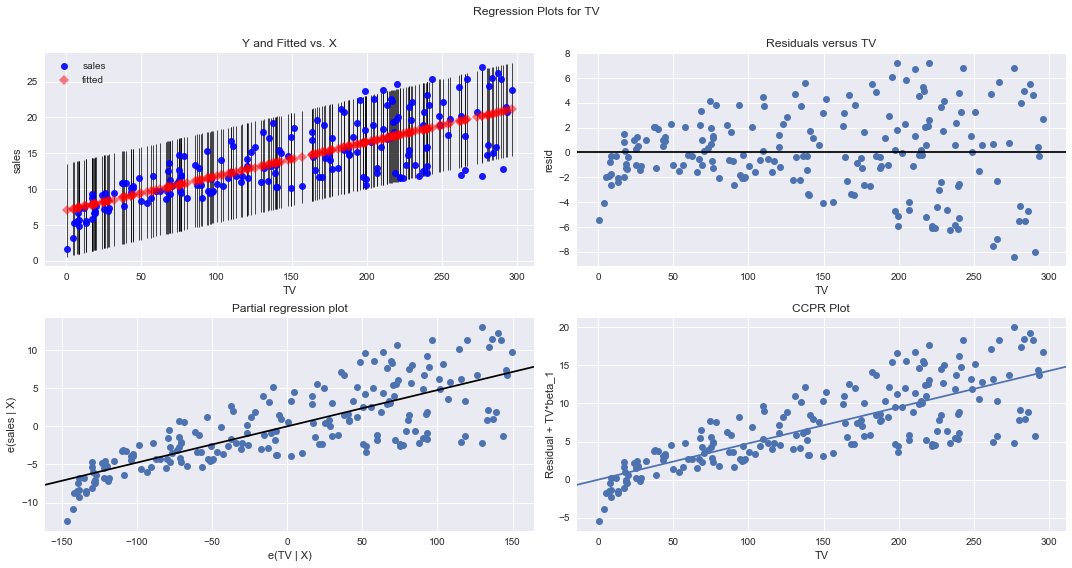

In [13]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()

In [153]:
# Record Your observations on residuals
'''From the first and second plot in the first row, we see that the variance is creating a cone-shape 
which is a sign of heteroscedasticity i.e. the residuals are not normally distributed . 
This breaks the assumption for linear regression.'''



'From the first and second plot in the first row, we see that the variance is creating a cone-shape \nwhich is a sign of heteroscedasticity i.e. the residuals are not normally distributed . \nThis breaks the assumption for linear regression.'

### Next, repeat above for radio and go through the same process, recording your observations

R-Squared: 0.33203245544529525
Intercept    9.311638
radio        0.202496
dtype: float64


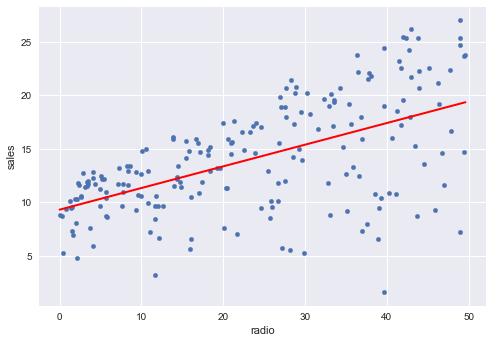

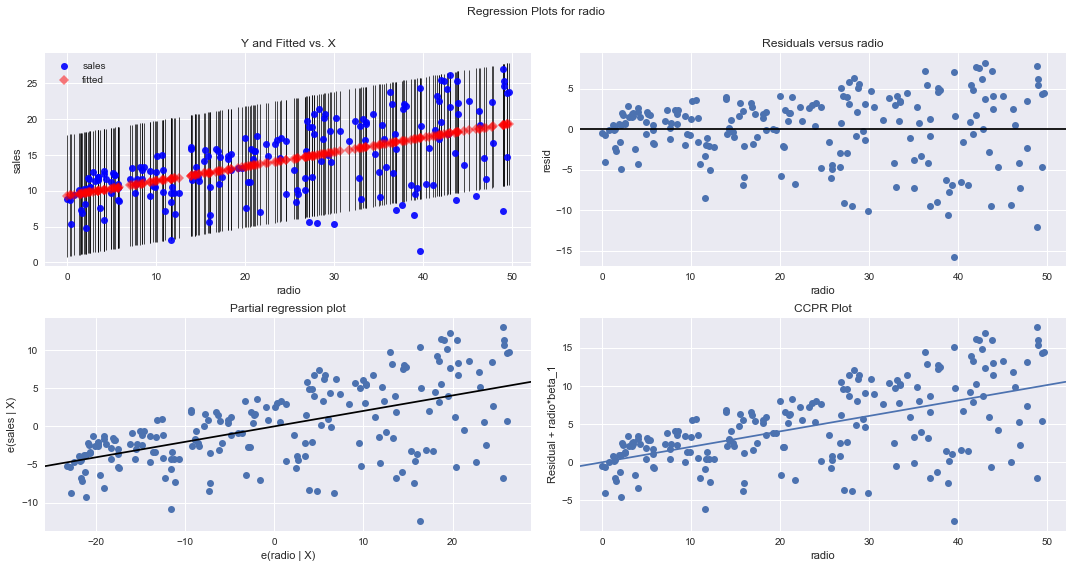

In [14]:

f = 'sales~radio'
model = ols(formula=f, data=df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'radio': [df.radio.min(), df.radio.max()]});
predictions = model.predict(X_new)
df.plot(kind='scatter', x='radio', y='sales');
plt.plot(X_new, predictions, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "radio", fig=fig)
plt.show()


In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           4.35e-19
Time:                        15:29:25   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Record your observations here for goodnes of fit 
# The variable radio ads is not a good predictor of sales
# It has higher amount of skewness and kurtosis is > 3
# R_squared is 33.2% of variance in the target variable

# A "unit" increase in radio spending is associated with a 0.2025 "unit" increase in Sales. 
# An additional 1,000 spent on radio is associated with an increase in sales of 20.02

# There is obvious heteroscedasticity as with the case of TV

## The Answer


Based on above analysis, we can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated normality and linearity assumptions. TV and radio did not provide a high value for co-efficient of determination - TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra pre-processing or use more advanced techniques. 

Remember there are lot of technqiues we can employ to FIX this data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, we shall look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lesson, we ran a complete regression analysis with a simple dataset. We looked for the regression assumptions pre and post the analysis phase. We also created some visualizations to develop a confidence on the model and check for its goodness of fit. 